(sec-text2circ)=

# From text to circuit

Thus far, our exploration of `lambeq` has been confined to sentence-level analysis. However, many compelling NLP tasks, such as discourse analysis, summarization, and coreference resolution, inherently operate at the discourse level, requiring models to understand and process relationships and structures spanning across multiple sentences. To make this kind of tasks possible on a quantum computer, `lambeq` supports {term}`DisCoCirc` {cite:p}`coecke_2021a`, a framework of compositional models (still at the experimental stage) with the ability to encode entire paragraphs or documents into a quantum circuit. The generated quantum circuits capture the core semantic information of the provided text, and can be trained using `lambeq`'s {ref}`machine learning <sec-ml-lambeq>` features.

{download}`⬇️ Download code <../_code/discocirc-basics.ipynb>`

## Basics

DisCoCirc represents the entities found in the text as wires flowing from top to bottom in a {term}`string diagram`. These entities are modified by boxes or {term}`frames <frame>`, corresponding to higher-order linguistic constructions in the text. Let's see a simple example.

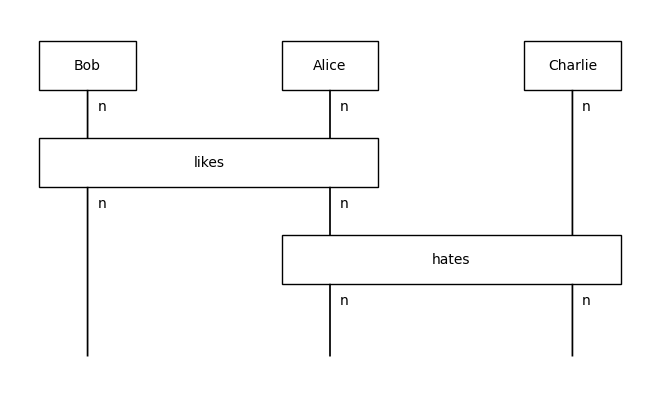

In [55]:
from lambeq.experimental.discocirc import DisCoCircReader

reader = DisCoCircReader()

text = "Bob likes Alice. Alice hates Charlie."
diagram = reader.text2circuit(text)
diagram.draw()

Our text has 3 entities, "Bob", "Alice", and "Charlie", and 2 boxes representing actions, "likes" and "hates", acting on and modifying these entities in the specific order. Note how the resulting diagram encapsulates the essential semantic content of the paragraph, abstracting away from its syntactic structure.

Let's move to a more interesting example.

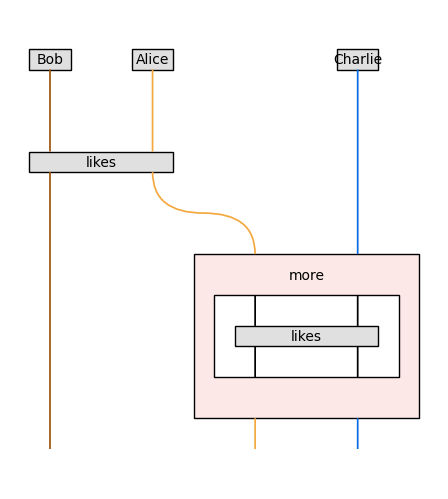

In [57]:
text = "Bob likes Alice. She likes Charlie more."
reader.text2circuit(text).draw()

Note that in this case the DisCoCirc reader uses _coreference resolution_ to match the pronoun "she" in the second sentence with "Alice". Also, the generated circuit now contains a box nested into a higher-order {term}`frame`, representing the fact that the adverb "more" modifies the verb "likes" in the context of the interaction between "Alice" and "Charlie".

```{note}
When frames are present in a string diagram, `lambeq` uses a colour encoding for wires and frames to make the diagram more readable, as in the above image. By default, the colour of each frame indicates its "type", i.e. the number of nested boxes.
```

Sometimes, an entity can interact with more than one actions, as in the following example:

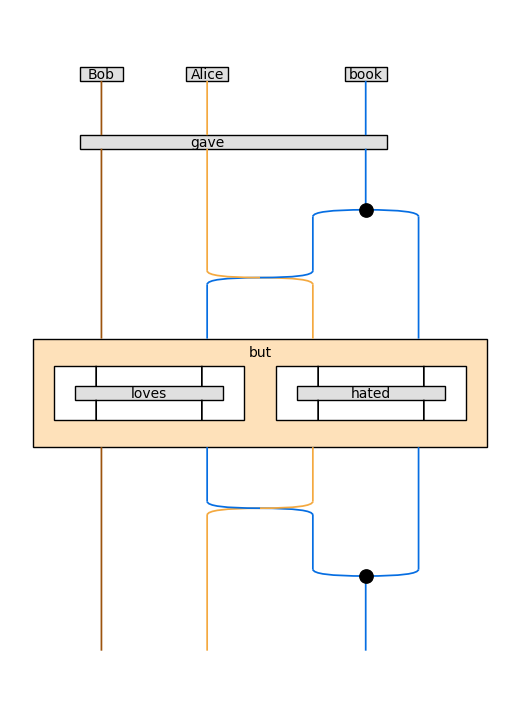

In [58]:
text = "Bob gave Alice a book. He loves it, but she hated it."
reader.text2circuit(text).draw(figsize=(5,7))

In the above, the book is loved by Bob, but at the same time hated by Alice. To allow this, the blue wire branches into two paths to interact with the separate actions and then recombines into a single wire to deliver the result. This branching and merging is achieved through {term}`spider` operations.

## Parsing longer texts

The {py:class}`~lambeq.experimental.discocirc.DisCoCircReader` is efficient and robust enough to parse really long texts, for example entire book chapters, into a single diagram. However, keep in mind that such a diagram can quickly become very dense, to the point it's difficult to read. In fact, as you can see below, even relatively short and simple texts can generate fairly complicated diagrams.

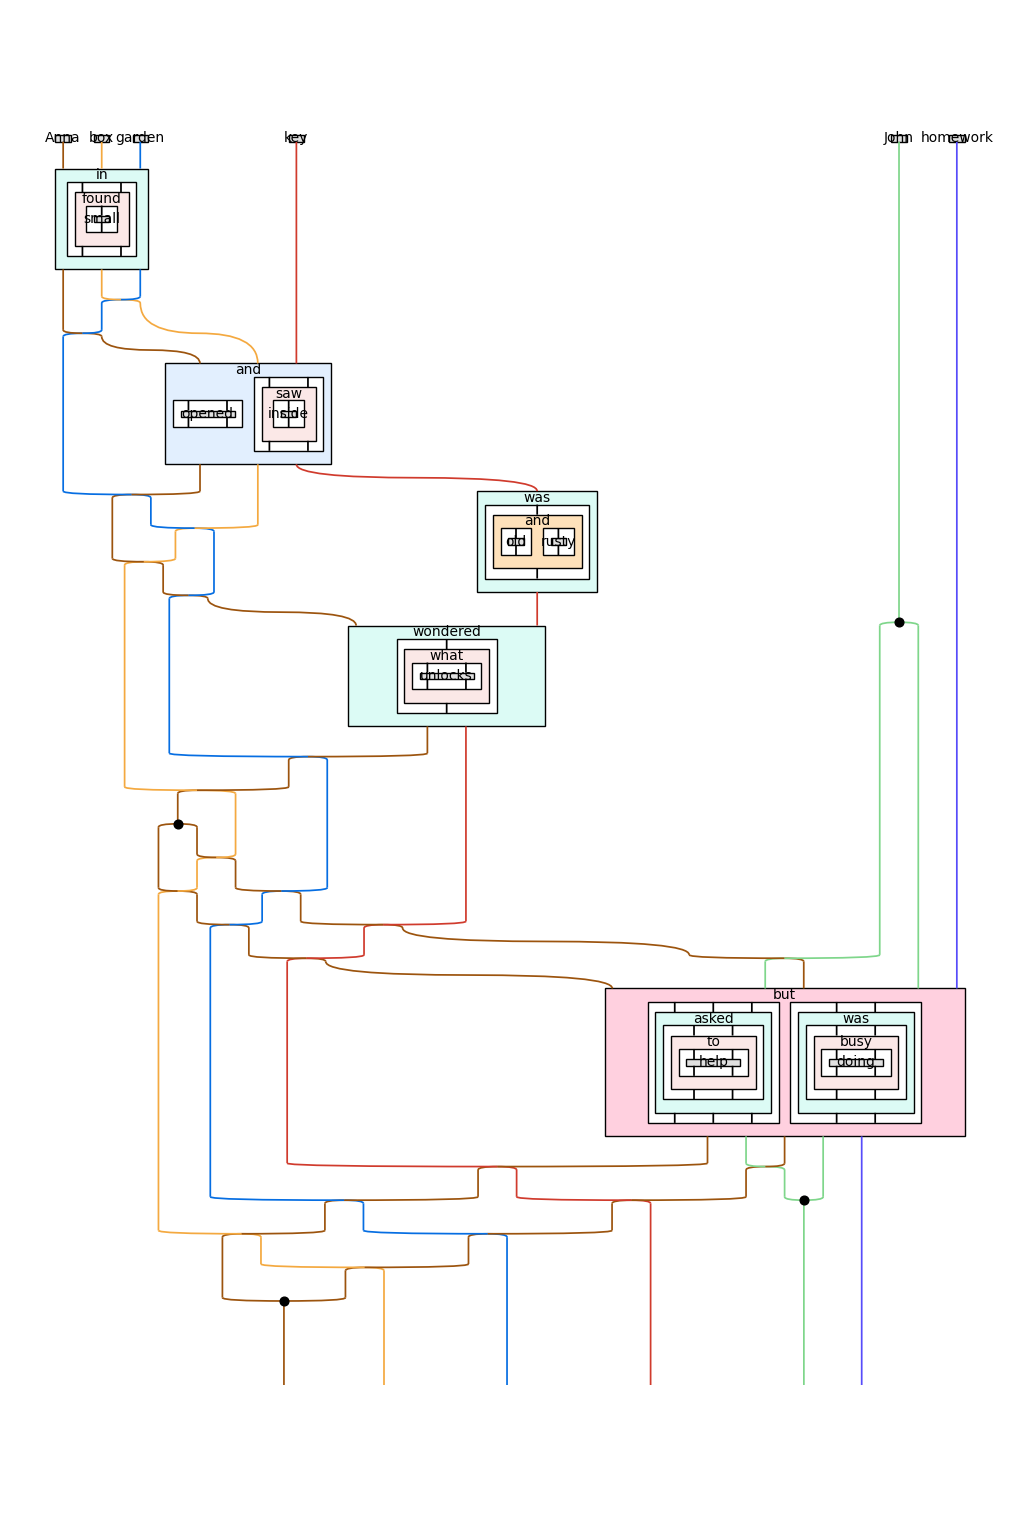

In [76]:
text = "Anna found a small box in the garden."\
       "She opened it and saw a key inside."\
       "The key was old and rusty."\
       "Anna wondered what it unlocks."\
       "She asked John to help her,"\
       "but he was busy doing homework."
reader.text2circuit(text).draw(figsize=(10,15))

```{note}
When trying to plot dense diagrams, increasing the size of the figure by using the `figsize` paramemeter in {py:meth}`~lambeq.backend.grammar.Diagram.draw` method can increase significantly the readability of the result.
```

## Simplifying the diagram

The {py:mod}`~lambeq.experimental.discocirc` package provides a few ways to abstact away some of the details of the text diagrams, which we introduce in the following sections.

### Rewrite rules

One way to avoid making your text diagrams excessively complex, is to reduce the amount of frame nesting in expressions that involve large chains of modifiers. Check the following example:

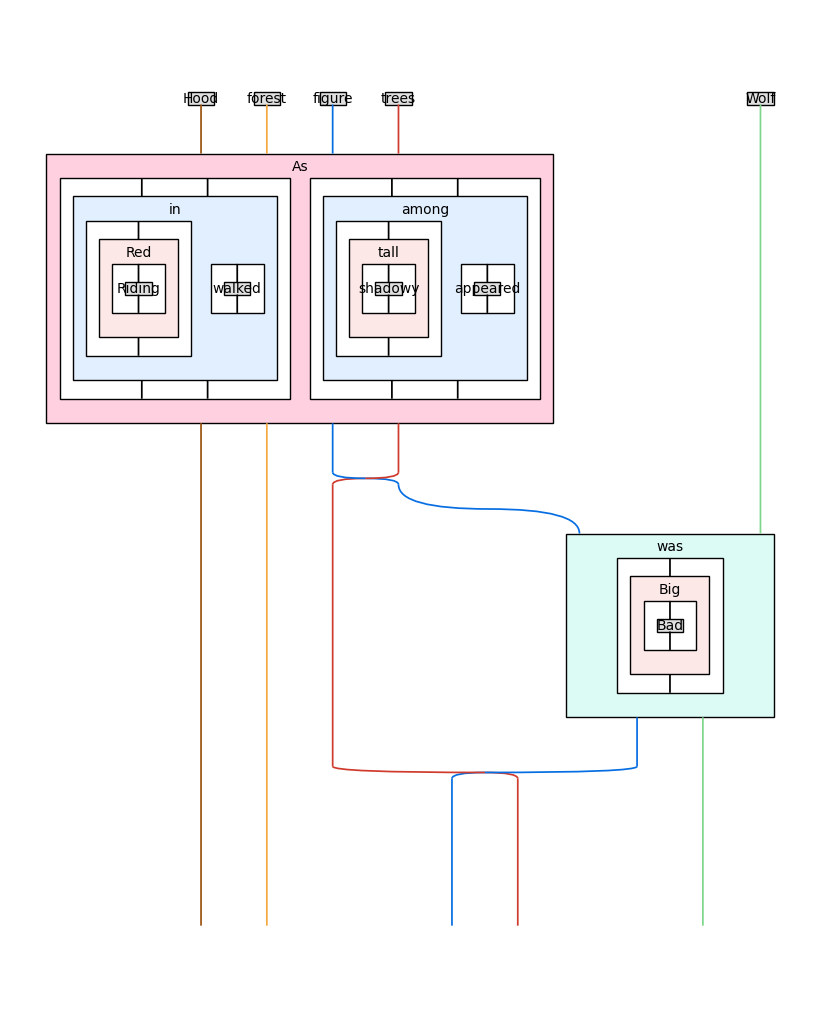

In [82]:
text =  "As Red Riding Hood walked in the forest, "\
        "a tall shadowy figure appeared among the trees. "\
        "It was the Big Bad Wolf."
reader.text2circuit(text).draw(figsize=(8,10))

Note that the entity "Red Riding Hood" has been represented simply as "hood", modified by the adjectives "red" and "riding" later in the timeline of the interactions in the text. Similarly, "big bad wolf" was analysed into a "wolf", modified by the higher-order boxes "big" and "bad". While this analysis makes linguistic sense, for cases like these it has very limited use. 

{py:class}`~lambeq.experimental.discocirc.DisCoCircReader` provides the means to avoid using that level of details through _rewrite rules_ that collapse long modification chains into a simple entity. For example, in order to collapse all the noun-modification chains in the above diagram you can use the `noun_modification` rule as below:

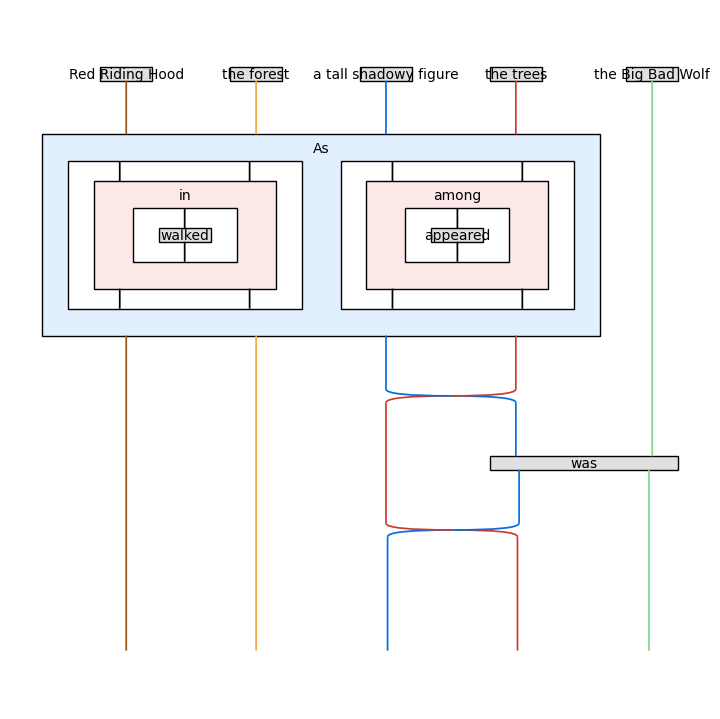

In [ ]:
reader.text2circuit(text, rewrite_rules=['noun_modification']).draw(figsize=(7,7))

The resulting diagram is significantly simplified, while the entities on the top of the diagram make much more sense for the given story.

The table below includes all the pre-defined rewrite rules with short descriptions.

(tbl-tree-rewrites)=

| Rewrite rule                                 | Description                                                                    |
| -------------------------------------------- | ------------------------------------------------------------------------------ |
| `determiner`                                 | Joins determiners ("the", "an", "a") with the nouns they modify              |
| `auxiliary`                                  | Attempts to collapse auxiliaries ("do", "is" etc) with entities or actions they modify |
| `noun_modification`                          | Collapses all noun modification chains into a single entity |
| `verb_modification`                          | Attempts to collapse verb modification chains into a single action |
| `sentence_modification`                      | Attempts to collapse sentence modification chains |

```{note}
Users can create their own rewrite rules programmatically by using the class {py:class}`~lambeq.experimental.discocirc.TreeRewriteRule` in the {py:mod}`lambeq.experimental.discocirc` package.
```

```{tip}
To collapse _all_ possibile modification chains in a diagram, create an empty {py:class}`~lambeq.experimental.discocirc.TreeRewriteRule` and pass it to `rewrite_rules` argument of the {py:meth}`~lambeq.experimental.discocirc.DisCoCircReader.text2circuit` method.
```



### Pruning infrequent nouns

** TBD

(sec-sandwich)=
## The "sandwich" functor

** TBD

## Applying an ansatz

** TBD

- {cite:p}`coecke_2021a`
- {cite:p}`duneau_2024`
- {cite:p}`laakkonen_2024`

```{rubric}See also:
```

- {ref}`sec-discocirc_training`